In [15]:
import numpy as np
import matplotlib.pyplot as plt
import math
import sympy as sym

Homework 1
==========
Run-and-tumble in a 1D concentration profile
--------------------------------------------

Consider the 1D run-and-tumble model as in the notebook [run-and-tumble.ipynb](./run-and-tumble.ipynb). What happens if the concentration profile is not simply a linear function? For example, let us place a food source at $x=500$, so that the concentration is peaked there and decreases with distance.

1. Choose a reasonable function to describe the concentration profile. Define it as a Python function that can be passed to the `run` method of the `RunTumble1D` class. Make sure that the function has appreciable gradient at $x=0$.

In [16]:
def concentration(x, x_peak = 500, diff_const = 50, t_const = 300):
    return (1 / math.sqrt((4 * math.pi * diff_const))) * math.exp((-((x_peak - x) ** 2)) / (4 * diff_const * t_const))

My reasoning for the concentration function here is in that in the same way bacteria moving (mostly) randomly diffuse,
some substance with a diffusion constant and over a given time would have the same pattern as the Gaussian, since at any
time, particles (of whatever the food source is) will on average be closer to the center/peak of concentration.
It's like if you put a drop of dye in water, it'll spread out radially

2. Start simulations of a population of bacteria from the origin and run for a sufficiently long time. Choose a set of times points, calculate the mean and variance of the distribution of their positions at these time points. Plot the mean and variance as functions of time, and describe the trends that you see.

In [17]:
# Assumption before I code the bacteria behavior:
# The bacteria can check if the concentration has increased or decreased /after/ the last movement, and their next run
# length will be based on this result.

In [18]:
# Run n' Tumble
class LessRandomWalk1D():
    """
    simulate run and tumble behavior of bacteria in 1D.
    """

    def __init__(self, dt=1., speed=50):
        # Changing the speed to 50 to be close-ish the 30 microns/second speed seen in bacteria but also so the model
        # will show clearer results
        """
        initialize the simulation by setting the initial position of the particle.
        inputs:
        dt: float, time step size.
        speed: float, each time step the particle moves a distance dx=dt*speed.
        """
        self.speed = speed
        self.dt = dt
        self.dx = dt * self.speed
        self.t = 0.    # current time since the beginning of the simulation
        self.x = 0.    # current position of the particle

    def run(self, T):
        """
        run the simulation until time T (total time since the very beginning). By defining the argument `T` this way,
        we can pick up the simulation where we left last time and continue to run it further.
        inputs:
        T: int, total amount of time since the beginning of simulation.
        """

        self.dx = -30

        n = int((T - self.t) / self.dt)     # number of time steps needed to simulate
        # This is still probably a fine n, though it won't be exactly accurate for the model
        for t in range(n):
            d_conc = concentration(x = self.x) - concentration(x = self.x - self.dx)
            # calculates if concentration has gone up or down
            if d_conc <= 0:
                self.dt = .1                     # time for a tumble, when not going towards increasing concentration
            if d_conc > 0:
                self.dt = 1                      # time for a walk, when going towards increasing concentration
            self.dx = self.dt * self.speed

            direction = np.random.rand()    # draw a random number uniformly from between 0 and 1
            # gets next move
            if direction < 0.5 and self.x > 0:
                # move left but makes sure it stays at x > 0 bc otherwise it won't Sense the concentration
                self.dx = -self.dx
            else:
                # move right
                self.dx = self.dx
            self.x += self.dx

            self.t += self.dt    # keep track of time since the beginning of the simulation

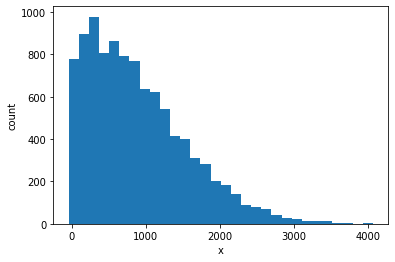

In [19]:
N = 10000       # number of simulations to run
T = 1000        # amount of time to run
results = []    # collect results from every simulation
for n in range(N):
    rw1 = LessRandomWalk1D()
    rw1.run(T = T)
    results.append(rw1.x)

nbins = 30    # number of bins to use
plt.figure()
plt.hist(results, bins=nbins)
plt.xlabel('x')
plt.ylabel('count')
plt.show()

3. Did the distribution reach a steady state? For that to happen, the mean and variance should both approach constant values. (What value do you expect the mean to approach?) If not, it means you have not run the simulations for long enough. In that case, repeat steps 2 for a longer time.

In [ ]:
rw1_list = [LessRandomWalk1D() for n in range(N)]    # create and save N instances of the class
T_list = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]    # time points at which we check the distribution
xmean_list = [0]    # list to collect the mean of the distribution at each time point above; first value is 0 at T=0
xvar_list = [0]    # list to collect the variance of the distribution at each time point above; first value is 0 at T=0

for T in T_list[1:]:    # skip the first time point T=0
    results = []        # collect results from every simulation
    for rw1 in rw1_list:
        rw1.run(T)    # run each simulation until time T
        results.append(rw1.x)
    xmean = np.mean(results)    # calculate the mean at each time point
    xvar = np.var(results)    # calculate the variance at each time point
    xmean_list.append(xmean)
    xvar_list.append(xvar)

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(12,4))    # make 2 subplots
ax[0].plot(T_list, xmean_list)    # ax[0] is the first subplot
ax[0].set_ylim(-10, 10)    # note the convention: ax.set_ylim() vs plt.ylim(); similarly below
ax[0].set_xlabel('time')
ax[0].set_ylabel('mean')
ax[1].plot(T_list, xvar_list)    # ax[1] is the second subplot
ax[1].set_xlabel('time')
ax[1].set_ylabel('variance')
plt.show()


4. Plot the distribution of their final positions. Describe the shape of the distribution. Does it look like a Gaussian distribution? (It does not have to, depending on the concentration profile you chose.) Try plotting a Gaussian distribution with the same mean and variance as your distribution, and see if it fits.

5. (optional) How does your result depend on the parameter `alpha`? Change its value and repeat the above steps to see how your result will be affected.